In [67]:
from __future__ import division
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import pylab as pl
import numpy as np
import sklearn as sklearn
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy import stats
import seaborn as sns
import xgboost as xgb
import scipy as scipy
from scipy.sparse import csr_matrix
from sklearn.grid_search import GridSearchCV

In [68]:
!pwd

/Users/Annmarie/ga-data-science


In [69]:
## import all the files we will need
train = pd.read_csv('./orange_small_train/orange_small_train.data',header=0,delimiter='\t')
labels= pd.read_csv('./orange_small_train_appetency.labels.txt',header=0,delimiter='\t')

In [70]:
## give title
train["label"] = labels

In [71]:
## delete data that is strings of random letters

columnNames = train.columns

goodColumns1 = columnNames[:188].tolist()
goodColumns1.append( columnNames[230] )

dfNew = train[goodColumns1]

In [72]:
## count the number on NaN's

train.count()

Var1        702
Var2       1241
Var3       1240
Var4       1579
Var5       1487
Var6      44471
Var7      44461
Var8          0
Var9        702
Var10      1487
Var11      1240
Var12       558
Var13     44461
Var14      1240
Var15         0
Var16      1487
Var17      1579
Var18      1579
Var19      1579
Var20         0
Var21     44471
Var22     44991
Var23      1487
Var24     42770
Var25     44991
Var26      1487
Var27      1487
Var28     44989
Var29       702
Var30       702
          ...  
Var202    49999
Var203    49857
Var204    50000
Var205    48066
Var206    44471
Var207    50000
Var208    49857
Var209        0
Var210    50000
Var211    50000
Var212    50000
Var213     1129
Var214    24592
Var215      694
Var216    50000
Var217    49297
Var218    49297
Var219    44789
Var220    50000
Var221    50000
Var222    50000
Var223    44789
Var224      820
Var225    23856
Var226    50000
Var227    50000
Var228    50000
Var229    21568
Var230        0
label     49999
dtype: int64

In [73]:
## Fill NaN values with the mean value of the column in order to prep the data for modeling 
for columnName in dfNew.columns:
    mean = dfNew[columnName].mean()
    dfNew[columnName].fillna(mean,inplace=True)

In [74]:
## Count to check
dfNew.count()

Var1      50000
Var2      50000
Var3      50000
Var4      50000
Var5      50000
Var6      50000
Var7      50000
Var8          0
Var9      50000
Var10     50000
Var11     50000
Var12     50000
Var13     50000
Var14     50000
Var15         0
Var16     50000
Var17     50000
Var18     50000
Var19     50000
Var20         0
Var21     50000
Var22     50000
Var23     50000
Var24     50000
Var25     50000
Var26     50000
Var27     50000
Var28     50000
Var29     50000
Var30     50000
          ...  
Var160    50000
Var161    50000
Var162    50000
Var163    50000
Var164    50000
Var165    50000
Var166    50000
Var167        0
Var168    50000
Var169        0
Var170    50000
Var171    50000
Var172    50000
Var173    50000
Var174    50000
Var175        0
Var176    50000
Var177    50000
Var178    50000
Var179    50000
Var180    50000
Var181    50000
Var182    50000
Var183    50000
Var184    50000
Var185        0
Var186    50000
Var187    50000
Var188    50000
label     50000
dtype: int64

In [75]:
##reprint totals 

for columnName in dfNew.columns:
    print columnName
    print sum( dfNew[columnName] )

Var1
574358.974359
Var2
201.450443191
Var3
21264919.3548
Var4
6269.79100697
Var5
11939666442.5
Var6
66321855.8162
Var7
340474.798138
Var8
nan
Var9
2407264.95726
Var10
19630282817.8
Var11
431290.32258
Var12
803584.229391
Var13
62484420.0535
Var14
37096.7741936
Var15
nan
Var16
6011963.75117
Var17
569664.344521
Var18
360797.973401
Var19
12254.5915136
Var20
nan
Var21
11725911.268
Var22
14512269.1205
Var23
376765.29926
Var24
225396.305822
Var25
4841350.49232
Var26
3530.59852051
Var27
1412.23940821
Var28
11225383.4582
Var29
1139.6011396
Var30
371794.871795
Var31
nan
Var32
nan
Var33
6350247520.65
Var34
58662.3690572
Var35
35840.5014336
Var36
7977692667.2
Var37
32426107409.7
Var38
128955346376.0
Var39
nan
Var40
698146.655923
Var41
1332692.30769
Var42
nan
Var43
207896.857373
Var44
8341.66833367
Var45
362806395.349
Var46
839806.607575
Var47
109401.709402
Var48
nan
Var49
4593.07010475
Var50
1784544.15954
Var51
2182600336.27
Var52
nan
Var53
32716325000.0
Var54
239484.286866
Var55
nan
Var56
4398233

In [76]:
# replace with the mean
#for columnName in cleanDf.columns:
    #mean = cleanDf[columnName].mean()
    #dfNew[columnName].fillna(mean,inplace=True)

In [77]:
#dropna on columns where all values are 0

dfNew.dropna(inplace = True, axis = 1)

/Users/Annmarie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [78]:
##make new csv

dfNew.to_csv("cleanData",index = False)

In [79]:
##change datatype

finalDf = pd.read_csv("cleanData",sep = ",", dtype = 'float32')

In [80]:
##look at the new datahead 

finalDf.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var179,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,label
0,11.48718,0.004029,425.298401,0.125396,238793.328125,1526.000000,7.0,48.145298,392605.65625,8.625807,...,3.138062,3776754.5,0.0,1416638.125,77773.796875,8.460918,3.299145,16.544159,167.368484,-1.0
1,11.48718,0.004029,425.298401,0.125396,238793.328125,525.000000,0.0,48.145298,392605.65625,8.625807,...,3.138062,3776754.5,0.0,1416638.125,77773.796875,8.460918,3.299145,16.544159,167.368484,-1.0
2,11.48718,0.004029,425.298401,0.125396,238793.328125,5236.000000,7.0,48.145298,392605.65625,8.625807,...,3.138062,3776754.5,0.0,1416638.125,77773.796875,8.460918,3.299145,16.544159,167.368484,-1.0
3,11.48718,0.004029,425.298401,0.125396,238793.328125,1326.437134,0.0,48.145298,392605.65625,8.625807,...,3.138062,3776754.5,0.0,1416638.125,77773.796875,8.460918,3.299145,16.544159,167.368484,-1.0
4,11.48718,0.004029,425.298401,0.125396,238793.328125,1029.000000,7.0,48.145298,392605.65625,8.625807,...,3.138062,3776754.5,0.0,1416638.125,77773.796875,8.460918,3.299145,16.544159,167.368484,-1.0


In [81]:
##check to make sure that it is in float32 format which is needed for sklearn

finalDf.dtypes

Var1      float32
Var2      float32
Var3      float32
Var4      float32
Var5      float32
Var6      float32
Var7      float32
Var9      float32
Var10     float32
Var11     float32
Var12     float32
Var13     float32
Var14     float32
Var16     float32
Var17     float32
Var18     float32
Var19     float32
Var21     float32
Var22     float32
Var23     float32
Var24     float32
Var25     float32
Var26     float32
Var27     float32
Var28     float32
Var29     float32
Var30     float32
Var33     float32
Var34     float32
Var35     float32
           ...   
Var156    float32
Var157    float32
Var158    float32
Var159    float32
Var160    float32
Var161    float32
Var162    float32
Var163    float32
Var164    float32
Var165    float32
Var166    float32
Var168    float32
Var170    float32
Var171    float32
Var172    float32
Var173    float32
Var174    float32
Var176    float32
Var177    float32
Var178    float32
Var179    float32
Var180    float32
Var181    float32
Var182    float32
Var183    

In [82]:
##describe the data

print finalDf.describe()

               Var1          Var2           Var3          Var4          Var5  \
count  50000.000000  50000.000000   50000.000000  50000.000000  5.000000e+04   
mean      11.493153      0.004028     425.361572      0.125449  2.386823e+05   
std        4.820350      0.022352     672.200770      0.226591  1.110455e+05   
min        0.000000      0.000000       0.000000      0.000000  0.000000e+00   
25%       11.487180      0.004029     425.298401      0.125396  2.387933e+05   
50%       11.487180      0.004029     425.298401      0.125396  2.387933e+05   
75%       11.487180      0.004029     425.298401      0.125396  2.387933e+05   
max      680.000000      5.000000  130668.000000     27.000000  6.048550e+06   

                Var6          Var7          Var9         Var10         Var11  \
count   50000.000000  50000.000000  50000.000000  5.000000e+04  50000.000000   
mean     1326.514893      6.809752     48.146469  3.925323e+05      8.625055   
std      2532.824806      5.965236     

In [83]:
import matplotlib
matplotlib.style.use('ggplot')

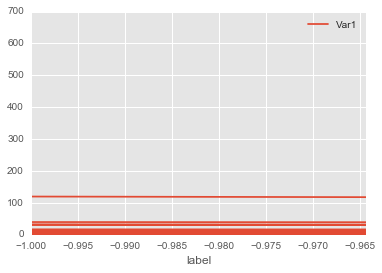

In [84]:
finalDf.plot(x='label', y='Var1')

In [85]:
print(dfNew.shape)

(50000, 173)


In [90]:
dfNew

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var179,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,label
0,11.487179,0.004029,425.298387,0.125396,238793.32885,1526.000000,7.000000,48.145299,392605.656355,8.625806,...,3.138062,3.776755e+06,0.000000,1.416638e+06,77773.795326,8.460919,3.299145,16.54416,167.368477,-1.000000
1,11.487179,0.004029,425.298387,0.125396,238793.32885,525.000000,0.000000,48.145299,392605.656355,8.625806,...,3.138062,3.776755e+06,0.000000,1.416638e+06,77773.795326,8.460919,3.299145,16.54416,167.368477,-1.000000
2,11.487179,0.004029,425.298387,0.125396,238793.32885,5236.000000,7.000000,48.145299,392605.656355,8.625806,...,3.138062,3.776755e+06,0.000000,1.416638e+06,77773.795326,8.460919,3.299145,16.54416,167.368477,-1.000000
3,11.487179,0.004029,425.298387,0.125396,238793.32885,1326.437116,0.000000,48.145299,392605.656355,8.625806,...,3.138062,3.776755e+06,0.000000,1.416638e+06,77773.795326,8.460919,3.299145,16.54416,167.368477,-1.000000
4,11.487179,0.004029,425.298387,0.125396,238793.32885,1029.000000,7.000000,48.145299,392605.656355,8.625806,...,3.138062,3.776755e+06,0.000000,1.416638e+06,77773.795326,8.460919,3.299145,16.54416,167.368477,-1.000000
5,11.487179,0.004029,425.298387,0.125396,238793.32885,658.000000,7.000000,48.145299,392605.656355,8.625806,...,3.138062,3.776755e+06,0.000000,1.416638e+06,77773.795326,8.460919,3.299145,16.54416,167.368477,-1.000000
6,11.487179,0.004029,425.298387,0.125396,238793.32885,1680.000000,7.000000,48.145299,392605.656355,8.625806,...,3.138062,3.776755e+06,0.000000,1.416638e+06,77773.795326,8.460919,3.299145,16.54416,167.368477,-1.000000
7,11.487179,0.004029,425.298387,0.125396,238793.32885,77.000000,0.000000,48.145299,392605.656355,8.625806,...,3.138062,3.776755e+06,0.000000,1.416638e+06,77773.795326,8.460919,3.299145,16.54416,167.368477,-1.000000
8,11.487179,0.004029,425.298387,0.125396,238793.32885,1176.000000,7.000000,48.145299,392605.656355,8.625806,...,3.138062,3.776755e+06,0.000000,1.416638e+06,77773.795326,8.460919,3.299145,16.54416,167.368477,-1.000000
9,11.487179,0.004029,425.298387,0.125396,238793.32885,1141.000000,7.000000,48.145299,392605.656355,8.625806,...,3.138062,3.776755e+06,0.000000,1.416638e+06,77773.795326,8.460919,3.299145,16.54416,167.368477,-1.000000


In [98]:
#X = dfNew.drop('label', axis=1)
#y = dfNew['label']

colsRes = ['label']
X = dfNew.drop('label', axis=1)
y = np.asarray(dfNew['label'], dtype="|S6")


In [103]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X, y)

from sklearn.tree import export_graphviz
from os import system 
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model,
                              out_file = dotfile,
                              feature_names = X.columns)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
    
build_tree_image(model)


In [104]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort('Importance Score', inplace=True, ascending=False)

features_df.head()

/Users/Annmarie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,Features,Importance Score
101,Var113,0.081865
46,Var57,0.074250
140,Var153,0.045934
121,Var133,0.045577
82,Var94,0.042294


**Discussion of Exploratory Analysis**

In order to properly clean the data I had to first read in the data, secondly I had to impute missing values with the mean value for the column. Lastly, I deleted any columns that has all NaN values and then convert everything into a csv. I then looked at the data head and chose a variable or two at random to graph just to get an idea of what the data looked like. In order to get a closer look at data this big I went with a random forest feature importance score to see what features had the largest impact. In order to this I set my X and y, taking care to convert y to a numpy array so it could be fit in the model. I then fit the model using the training data and calculated the feature importances. 


For an extra challenge I have also decided to attempt feature importances using xgboost so I have some comparison, to do this I will need to preprocess the test data and so I will be completing this in part 4. In the final part of this project I will use both a random forest and an xgboosted random forest and I will preform a similar comparison and analysis. In reflection to parts one and two of this project, the data was much messier than expected and required a large amount of preprocessing to convert into a form for analysis. In order to complete this project I have decided to focus on one dependent variable which is the likelihood to buy new products or services as described by appetency or the column 'label' in our dataset. Overall, I thought this was the most important thing to predict in order to test the strength of my model due to my domain knowledge. In sales, the thing a representative is most interested in is whether or not the person they are selling to is even likely to buy a new product at all. 